In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
import re
from collections import Counter

In [2]:
data_1 = ('amazon_cells_labelled.txt')
data_2 = ('yelp_labelled.txt')
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

txt_raw.head()

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [3]:
positive = (txt_raw['score'] == 1)
txt_raw[positive]

,sentence,score
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
4,The mic is great.,1
7,If you are Razr owner...you must have this!,1
10,And the sound quality is great.,1
11,He was very impressed when going from the orig...,1
13,Very good quality though,1
15,Highly recommend for any one who has a blue to...,1
17,So Far So Good!.,1
18,Works great!.,1


In [4]:
keywords = ['good', 'great', 'excellent', 'must have', 'love', 'recommend', 'best', 'stylish', 'comfort', 'pleased', 
            'highly', 'definitely', 'amazing', 'well', 'easier', 'like', 'satisfied', 'joy', 'nice', 'loved', 
           'easy', '10', 'fulfills', 'recommended', 'impressed', 'works', 'reasonable', 'well', 'fine']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

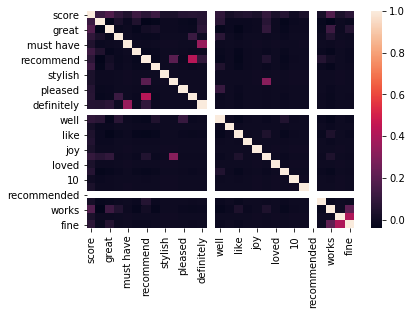

In [5]:
sns.heatmap(txt_raw.corr())

In [6]:
data = txt_raw[keywords]
target = positive

In [7]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

print("Accuracy : {}%".format(
    bnb.score(data, target) * 100
))

Number of mislabeled points out of a total 1000 points : 336
Accuracy : 66.4%


### Adding a confusion matrix for the first dataset

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target,y_pred)

array([[464,  36],
       [300, 200]])

In [11]:
# Build your confusion matrix and calculate sensitivity and specificity here.

    
def evaluate(dataframe, target, predicted):
    hits = (target == predicted).sum()
    misses = (target != predicted).sum()
    accuracy = (hits / dataframe.shape[0]) * 100
    
    """Manually create confusion matrix by comparing predictions with answers."""
    # initialize counts
    TP = 0 # Positive review (1) predicted as Positive
    TN = 0 # Negative review (0) predicted as Negative
    FP = 0 # Negative review (0) predicted as Positive (1)
    FN = 0 # Positive review (1) predicted as Negative (0)
    
    x = 0
    while x < len(target):
        if target[x] == 0 and predicted[x] == 0:  # True Negative
            TN += 1
        if target[x] == 0 and predicted[x] == 1:  # False Positive
            FP += 1
        if target[x] == 1 and predicted[x] == 1:  # True Positive
            TP += 1
        if target[x] == 1 and predicted[x] == 0:  # False Negative
            FN += 1
        x += 1
    
    # make confusion matrix from counts
    cm = [[TP, FN],[FP, TN]]
    
    con_mat = np.array([['','Positive','Negative'], #columns are predictions
                ['Positive',TP,FN], 
                ['Negative',FP,TN]])
                
    df_confusion = pd.DataFrame(data=con_mat[1:,1:],
                                index=con_mat[1:,0],
                                columns=con_mat[0,1:])

    """Manually calculate sensetivity and specificity"""
    # calculate sensitivity and specificity
    sensitivity = TP / (TP + FN)
    specificity = TN / (TN + FP)
    
    
    # Display evaluation metrics with output dictionary
    output = {'':df_confusion,
              'Total datapoints (n)':dataframe.shape[0],
              'Mislabeled Points':misses,
              'Accuracy':accuracy,
              'Type I':FP,
              'Type II':FN,
              'Sensitivity':sensitivity,
              'Specificity':specificity}
    
    return output

In [12]:
evaluate(data, target, y_pred)

{'':          Positive Negative
 Positive      200      300
 Negative       36      464,
 'Total datapoints (n)': 1000,
 'Mislabeled Points': 336,
 'Accuracy': 66.4,
 'Type I': 36,
 'Type II': 300,
 'Sensitivity': 0.4,
 'Specificity': 0.928}

### Cross validation to check for accuracy across multiple test groups

In [13]:
# Cross validation using sklearn
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.7 , 0.65, 0.65, 0.66, 0.69, 0.6 , 0.69, 0.63, 0.67, 0.61])

#### Some features are causing a lot of variation so I'll do some modifications

## 2. Modify and run model a second time

In [14]:
# Reset the dataframe
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

### Clean the text data and re-run model

In [15]:
# Remove punctuation and non-alphanumeric characters, then lowercase all text
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('-',' ', str(x))) # separate hyphenated words
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('[^\w\s\d]','', str(x))) # strip non-alphanumeric characters
txt_raw['sentence'] = txt_raw['sentence'].str.lower() # convert all to lowercase

In [16]:
#Keeping the same keywords
keywords2 = ['good', 'great', 'excellent', 'must have', 'love', 'recommend', 'best', 'stylish', 'comfort', 'pleased', 
            'highly', 'definitely', 'amazing', 'well', 'easier', 'like', 'satisfied', 'joy', 'nice', 'loved', 
           'easy', '10', 'fulfills', 'recommended', 'impressed', 'works', 'reasonable', 'well', 'fine']

#adding more regex to find the keywords
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [17]:
positive = (txt_raw['score'] == 1)

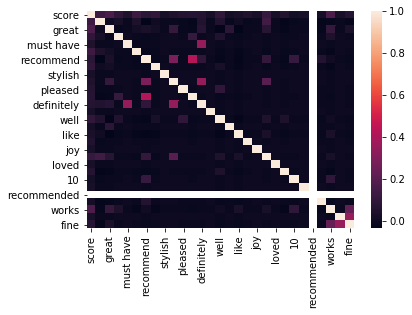

In [18]:
sns.heatmap(txt_raw.corr())

In [19]:
data = txt_raw[keywords]
target = positive

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [20]:
evaluate(data, target, y_pred)

{'':          Positive Negative
 Positive      193      307
 Negative       33      467,
 'Total datapoints (n)': 1000,
 'Mislabeled Points': 340,
 'Accuracy': 66.0,
 'Type I': 33,
 'Type II': 307,
 'Sensitivity': 0.386,
 'Specificity': 0.934}

In [21]:
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.66, 0.66, 0.64, 0.68, 0.6 , 0.67, 0.64, 0.68, 0.6 ])

> With simple text cleaning, this second run actually performed worse on the positive reviews, but improved the detection of negative reviews both by small amounts.

> The cross validation scores show that the variance is slightly more consistent

## 3. Modify and run model a third time

In [22]:
# create a dataframe containing counts of each word in both positive and negative reviews 
words = pd.DataFrame()

# Create a list of all unique words
all_words = []
for rev in txt_raw['sentence']:
    for word in rev.split():
        all_words.append(word)        
all_words = set(all_words)

# Retrieve counts of each word for positive reviews
pos_words = []
for rev in txt_raw['sentence'].loc[txt_raw['score'] == 1]:
    for word in rev.split():
        pos_words.append(word)   
pos_counts = Counter(pos_words)

# Retrieve counts of each word for negative reviews
neg_words = []
for rev in txt_raw['sentence'].loc[txt_raw['score'] == 0]:
    for word in rev.split():
        neg_words.append(word)         
neg_counts = Counter(neg_words)

In [23]:
# Create a dataframe summarizing words by their frequencies in each type of review
words['word'] = list(all_words)
words = words.set_index('word')

words['pos_count'] = 0
for word in words.index:
    if word in pos_counts:
        words.at[word, 'pos_count'] = pos_counts[word]

words['neg_count'] = 0
for word in words.index:
    if word in neg_counts:
        words.at[word, 'neg_count'] = neg_counts[word]

words['total_count'] = words['pos_count'] + words['neg_count']
        
words['is_positive'] = 0
words.loc[words['neg_count'] < words['pos_count'], 'is_positive'] = 1

words['delta'] = abs(words['pos_count'] - words['neg_count'])

words['scaled_delta'] = words['delta'] / words['total_count']

#### Dataframe of unique words summary

> Trying to find the most popular words and see if using them in my keyword list will make the model better

In [24]:
words

,pos_count,neg_count,total_count,is_positive,delta,scaled_delta
word,,,,,,
although,0,2,2,0,2,1.000000
avoid,1,2,3,0,1,0.333333
unacceptableunless,0,1,1,0,1,1.000000
resolution,0,2,2,0,2,1.000000
8,0,1,1,0,1,1.000000
bar,1,1,2,0,0,0.000000
range,5,0,5,1,5,1.000000
goesthe,0,1,1,0,1,1.000000
only,5,17,22,0,12,0.545455


In [25]:
words.describe()

,pos_count,neg_count,total_count,is_positive,delta,scaled_delta
count,1898.000000,1898.000000,1898.000000,1898.000000,1898.000000,1898.00000
mean,2.606428,2.783983,5.390411,0.412013,2.092202,0.79774
std,11.371315,11.356945,22.155245,0.492327,4.622882,0.34708
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.60000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,1.00000
75%,1.000000,2.000000,3.000000,1.000000,2.000000,1.00000
max,237.000000,277.000000,514.000000,1.000000,87.000000,1.00000


In [26]:
# Reset the dataframe
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

positive = (txt_raw['score'] == 1)

In [27]:
#Choosing keywords by weighted score
keywords3 = []
keywords3 = list(words.loc[((words['pos_count']) > (words['neg_count'])) & (words['total_count'] > 5) & 
                           (words['scaled_delta'] > .7)].index)

print(keywords3)

['without', 'highly', 'love', 'excellent', 'both', 'jabra', 'great', 'happy', 'works', 'fine', 'price', 'best', 'fits', 'years', 'pretty', 'perfectly', 'nice']


In [28]:
#adding more regex to find the keywords
for key in keywords3:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

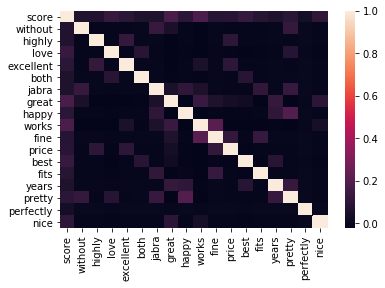

In [29]:
sns.heatmap(txt_raw.corr())

In [30]:
data = txt_raw[keywords3]
target = positive

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [31]:
evaluate(data, target, y_pred)

{'':          Positive Negative
 Positive      156      344
 Negative        9      491,
 'Total datapoints (n)': 1000,
 'Mislabeled Points': 353,
 'Accuracy': 64.7,
 'Type I': 9,
 'Type II': 344,
 'Sensitivity': 0.312,
 'Specificity': 0.982}

In [32]:
cross_val_score(bnb, data, target, cv=10)

array([0.66, 0.63, 0.64, 0.65, 0.7 , 0.59, 0.69, 0.67, 0.63, 0.6 ])

> Further text manipulation has improved detecting negative reviews, but worsened type two errors.

### 4. Combine Regex and Dataframe of Words to run a fourth model

In [33]:
# Reset the dataframe
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

positive = (txt_raw['score'] == 1)

In [34]:
# Remove punctuation and non-alphanumeric characters, then lowercase all text
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('-',' ', str(x))) # separate hyphenated words
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('[^\w\s\d]','', str(x))) # strip non-alphanumeric characters
txt_raw['sentence'] = txt_raw['sentence'].str.lower() # convert all to lowercase

In [35]:
#created a new worsd dataframe
words2 = pd.DataFrame()

#import stopwords from nltk to remove stopwords from reviews
from nltk.corpus import stopwords 
stop_words = set(stopwords.words('english'))

# Create a list of all unique words and remove stop words
all_words2 = []
for rev in txt_raw['sentence']:
    for word in rev.split():
        if word not in stop_words:
            all_words2.append(word)        
all_words2 = set(all_words2)

# Retrieve counts of each word for positive reviews
pos_words = []
for rev in txt_raw['sentence'].loc[txt_raw['score'] == 1]:
    for word in rev.split():
        pos_words.append(word)   
pos_counts = Counter(pos_words)

# Retrieve counts of each word for negative reviews
neg_words = []
for rev in txt_raw['sentence'].loc[txt_raw['score'] == 0]:
    for word in rev.split():
        neg_words.append(word)         
neg_counts = Counter(neg_words)

In [36]:
# Create a dataframe summarizing words by their frequencies in each type of review
words2['word'] = list(all_words2)
words2 = words2.set_index('word')

words2['pos_count'] = 0
for word in words2.index:
    if word in pos_counts:
        words2.at[word, 'pos_count'] = pos_counts[word]

words2['neg_count'] = 0
for word in words2.index:
    if word in neg_counts:
        words2.at[word, 'neg_count'] = neg_counts[word]

words2['total_count'] = words2['pos_count'] + words2['neg_count']
        
words2['is_positive'] = 0
words2.loc[words2['neg_count'] < words2['pos_count'], 'is_positive'] = 1

words2['delta'] = abs(words2['pos_count'] - words2['neg_count'])

words2['scaled_delta'] = words2['delta'] / words2['total_count']

In [37]:
keywords4 = []
keywords4 = list(words2.loc[((words2['pos_count']) > (words2['neg_count'])) & (words2['total_count'] > 3) & 
                           (words2['scaled_delta'] > .7)].index)

print(keywords4)

['range', 'without', 'seller', 'highly', 'love', 'free', 'excellent', 'comfortably', 'seems', 'jabra', 'great', 'happy', 'leather', 'definitely', 'works', 'fine', 'awesome', 'price', 'best', 'fits', 'fast', 'keyboard', 'pleased', 'family', 'years', 'cases', 'sturdy', 'pretty', 'perfectly', 'order', 'value', 'charm', 'satisfied', 'nice']


In [38]:
#regex on the keywords
for key in keywords4:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

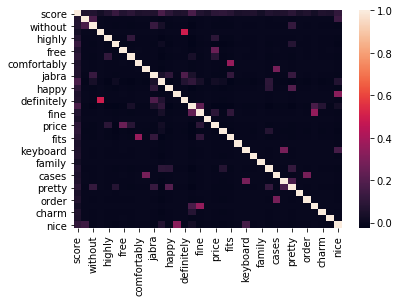

In [39]:
sns.heatmap(txt_raw.corr())

In [40]:
data = txt_raw[keywords4]
target = positive

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
# from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [41]:
evaluate(data, target, y_pred)

{'':          Positive Negative
 Positive      201      299
 Negative       14      486,
 'Total datapoints (n)': 1000,
 'Mislabeled Points': 313,
 'Accuracy': 68.7,
 'Type I': 14,
 'Type II': 299,
 'Sensitivity': 0.402,
 'Specificity': 0.972}

In [42]:
cross_val_score(bnb, data, target, cv=10)

array([0.69, 0.67, 0.67, 0.68, 0.74, 0.64, 0.72, 0.7 , 0.69, 0.62])

In [43]:
scores = cross_val_score(bnb, data, target, cv=10)
scores.mean()

0.6819999999999999

> The first and this model (#4) have had the most success. The fourth model has increased accuracy from 66.4% to 68.7%, but there are still issues with correctly identifying positive comments.

### 5. Run the last model again but with more keywords deemed important

> I'll first try and see which words are being misclassified the most

In [58]:
# Comparing each feature with true positive against false negatives
for col in txt_raw.columns[2:]:
    print(col, txt_raw.loc[(txt_raw["score"] == True) & (txt_raw[col] == True), col].sum(),
          txt_raw.loc[(txt_raw["score"] == False) & (txt_raw[col] == True), col].sum())

range 4 0
without 7 1
clear 7 2
seller 1 0
highly 7 1
love 16 0
free 5 0
excellent 9 0
easy 10 3
good 41 12
comfortably 3 0
seems 4 0
well 19 4
jabra 6 1
great 37 3
working 9 0
happy 11 1
leather 3 0
definitely 4 0
priced 4 1
works 32 1
fine 7 1
awesome 2 0
price 11 1
best 15 2
fits 9 1
fast 2 0
keyboard 3 0
pleased 4 0
family 1 0
years 7 1
cases 3 0
sturdy 4 0
pretty 8 0
perfectly 2 0
order 4 0
hands 4 1
value 1 0
charm 4 0
comfortable 9 3
satisfied 3 0
nice 12 0


> #### The words that performed the worst are<br>
>> comfortable (fn:3) and well (fn:4)

In [45]:
words2.loc['great']

pos_count       92.000000
neg_count        5.000000
total_count     97.000000
is_positive      1.000000
delta           87.000000
scaled_delta     0.896907
Name: great, dtype: float64

In [46]:
words2.loc['works']

pos_count       46.000000
neg_count        1.000000
total_count     47.000000
is_positive      1.000000
delta           45.000000
scaled_delta     0.957447
Name: works, dtype: float64

#### I'll run the same model as in the fourth run with keywords of weighted importance .6 and without the keywords 'great' and 'works'.

In [47]:
# Reset the dataframe
txt_raw = pd.read_csv(data_1, delimiter= '\t', header=None)
txt_raw.columns = ['sentence', 'score'] # 1 = positive 0 = negative

positive = (txt_raw['score'] == 1)

In [48]:
# Remove punctuation and non-alphanumeric characters, then lowercase all text
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('-',' ', str(x))) # separate hyphenated words
txt_raw['sentence'] = txt_raw['sentence'].apply(lambda x: re.sub('[^\w\s\d]','', str(x))) # strip non-alphanumeric characters
txt_raw['sentence'] = txt_raw['sentence'].str.lower() # convert all to lowercase

In [49]:
keywords5 = []
keywords5 = list(words2.loc[((words2['pos_count']) > (words2['neg_count'])) & (words2['total_count'] > 3) & 
                           (words2['scaled_delta'] > .6)].index)

print(keywords5)

['range', 'without', 'clear', 'seller', 'highly', 'love', 'free', 'excellent', 'easy', 'good', 'comfortably', 'seems', 'well', 'jabra', 'great', 'working', 'happy', 'leather', 'definitely', 'priced', 'works', 'fine', 'awesome', 'price', 'best', 'fits', 'fast', 'keyboard', 'pleased', 'family', 'years', 'cases', 'sturdy', 'pretty', 'perfectly', 'order', 'hands', 'value', 'charm', 'comfortable', 'satisfied', 'nice']


In [50]:
#keywords5.remove('great')
#keywords5.remove('works')
print(keywords5)

['range', 'without', 'clear', 'seller', 'highly', 'love', 'free', 'excellent', 'easy', 'good', 'comfortably', 'seems', 'well', 'jabra', 'great', 'working', 'happy', 'leather', 'definitely', 'priced', 'works', 'fine', 'awesome', 'price', 'best', 'fits', 'fast', 'keyboard', 'pleased', 'family', 'years', 'cases', 'sturdy', 'pretty', 'perfectly', 'order', 'hands', 'value', 'charm', 'comfortable', 'satisfied', 'nice']


In [51]:
#regex on the keywords
for key in keywords5:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    txt_raw[str(key)] = txt_raw.sentence.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

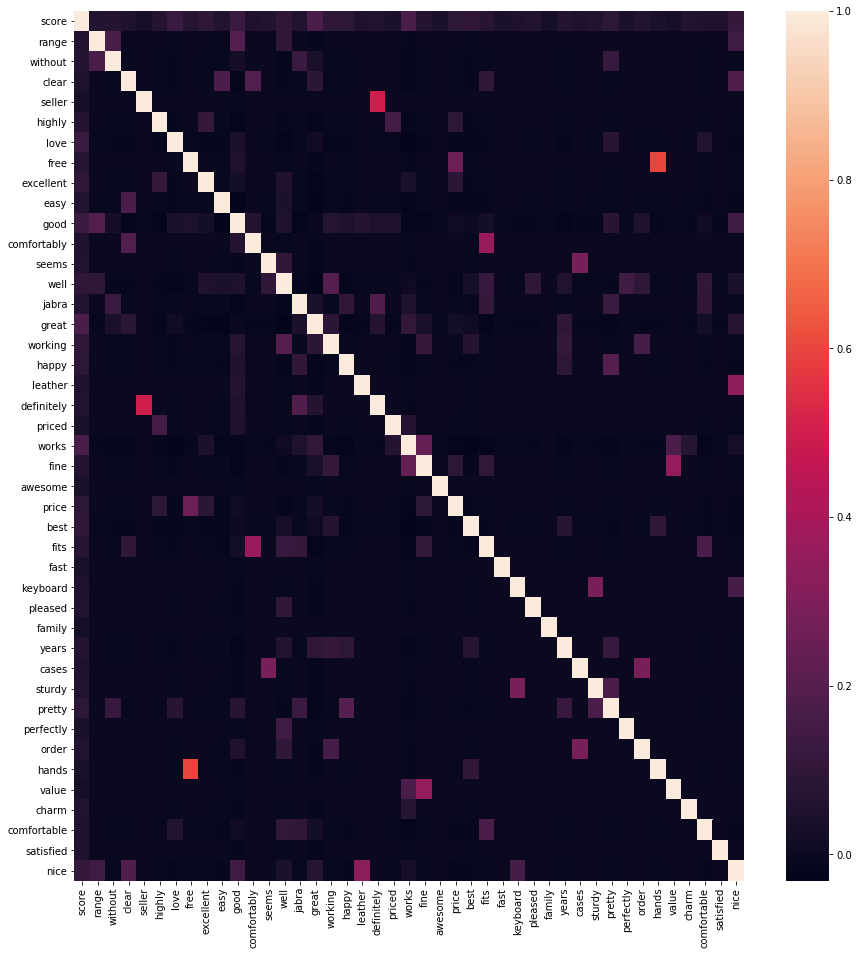

In [52]:
plt.figure(figsize=(15, 16))
sns.heatmap(txt_raw.corr())

> #### Hands and Free have a high correlation to each other, so consider removing

In [53]:
keywords5.remove('hands')
print(keywords5)

['range', 'without', 'clear', 'seller', 'highly', 'love', 'free', 'excellent', 'easy', 'good', 'comfortably', 'seems', 'well', 'jabra', 'great', 'working', 'happy', 'leather', 'definitely', 'priced', 'works', 'fine', 'awesome', 'price', 'best', 'fits', 'fast', 'keyboard', 'pleased', 'family', 'years', 'cases', 'sturdy', 'pretty', 'perfectly', 'order', 'value', 'charm', 'comfortable', 'satisfied', 'nice']


In [54]:
data = txt_raw[keywords5]
target = positive

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
# from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

In [55]:
evaluate(data, target, y_pred)

{'':          Positive Negative
 Positive      250      250
 Negative       37      463,
 'Total datapoints (n)': 1000,
 'Mislabeled Points': 287,
 'Accuracy': 71.3,
 'Type I': 37,
 'Type II': 250,
 'Sensitivity': 0.5,
 'Specificity': 0.926}

In [56]:
cross_val_score(bnb, data, target, cv=10)

array([0.72, 0.7 , 0.72, 0.68, 0.76, 0.67, 0.73, 0.71, 0.71, 0.68])

In [57]:
scores2 = cross_val_score(bnb, data, target, cv=10)
scores2.mean()

0.708

> There is signifacntly less variance in this model (cross validation), but it performed exactly the same in detecting negative reviews as model two which is a poorer performance than models 3 and 4. <br>
For positive reviews this has the best performance with sensitivity at 41.2%.

### Wrap up evaluations
    -Do any of your classifiers seem to overfit?
    -Which seem to perform the best? Why?
    -Which features seemed to be most impactful to performance?
    
    
1. I don't think there was any overfitting because the accuracy never made it above 75% for any model. <br>
2. I would say that model 5 performed the best because of there was less variance between each cross validation score, and even though it didn't perform the best with negative reviews, the fifth model did the best at detecting positive reviews, which was the goal.<br>
3. The keywords included in the final model (5) were the most impactful. The words love good and great are the highest ranking.